In [1]:
from keras.datasets  import cifar10
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

#### Visualize

In [4]:
y_train[2]

array([9], dtype=uint8)

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck']

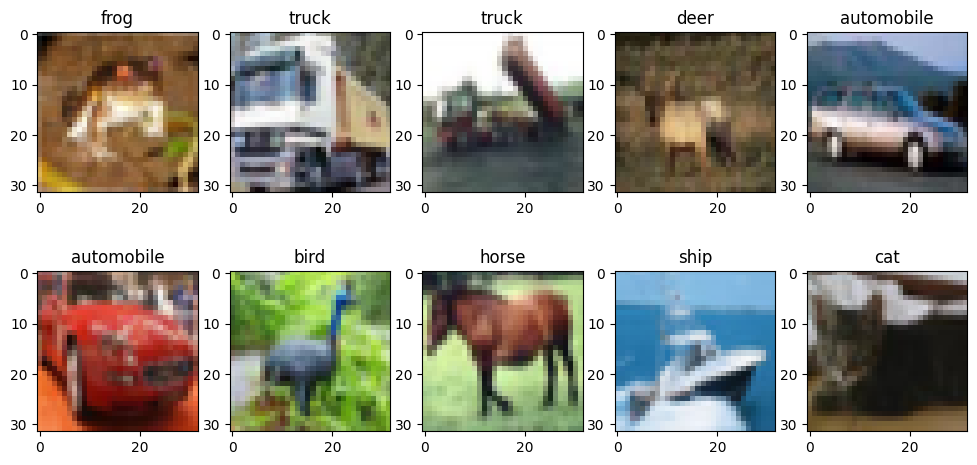

In [6]:
plt.figure(figsize=(12,15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
plt.show()

#### Prepare dataset

In [7]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
x_train = x_train.reshape(-1,32,32,3).astype('float')/255 # Rows, Columns, Channels
x_test = x_test.reshape(-1,32,32,3).astype('float')/255 # Rows, Columns, Channels

In [8]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
x_train[0].shape

(32, 32, 3)

#### Model Building

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, MaxPool2D, Flatten, Input, Dropout
from keras.optimizers import RMSprop, Adam

In [11]:
model = Sequential()
model.add(Conv2D(filters=10, kernel_size = (3,3), strides = (1,1)))
model.add(Activation('relu')) # 32x32

model.add(Conv2D(filters=10, kernel_size = (3,3), strides = (1,1)))
model.add(Activation('relu')) # 32x32

model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1))) # 14x14
model.add(Flatten())
# model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax')) # output

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [13]:
model.fit(x=x_train,
         y=y_train_ohe,
         batch_size=1000,
         validation_data=(x_test, y_test_ohe),
         epochs = 10)

Epoch 1/10
50/50 [==============================] - 15s 306ms/step - loss: 1.9349 - accuracy: 0.3164 - val_loss: 1.6666 - val_accuracy: 0.4227
Epoch 2/10
50/50 [==============================] - 17s 350ms/step - loss: 1.5676 - accuracy: 0.4527 - val_loss: 1.4876 - val_accuracy: 0.4819
Epoch 3/10
50/50 [==============================] - 17s 338ms/step - loss: 1.4321 - accuracy: 0.4966 - val_loss: 1.3978 - val_accuracy: 0.5115
Epoch 4/10
50/50 [==============================] - 18s 350ms/step - loss: 1.3492 - accuracy: 0.5292 - val_loss: 1.3459 - val_accuracy: 0.5280
Epoch 5/10
50/50 [==============================] - 17s 340ms/step - loss: 1.2961 - accuracy: 0.5479 - val_loss: 1.2948 - val_accuracy: 0.5473
Epoch 6/10
50/50 [==============================] - 16s 325ms/step - loss: 1.2444 - accuracy: 0.5670 - val_loss: 1.2590 - val_accuracy: 0.5612
Epoch 7/10
50/50 [==============================] - 16s 325ms/step - loss: 1.2078 - accuracy: 0.5798 - val_loss: 1.2420 - val_accuracy: 0.5654

In [14]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

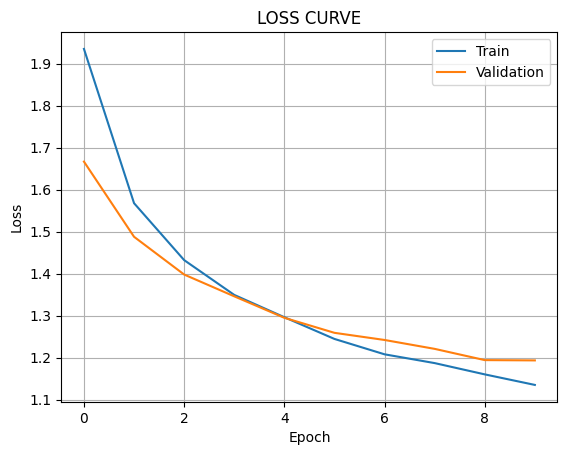

In [15]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

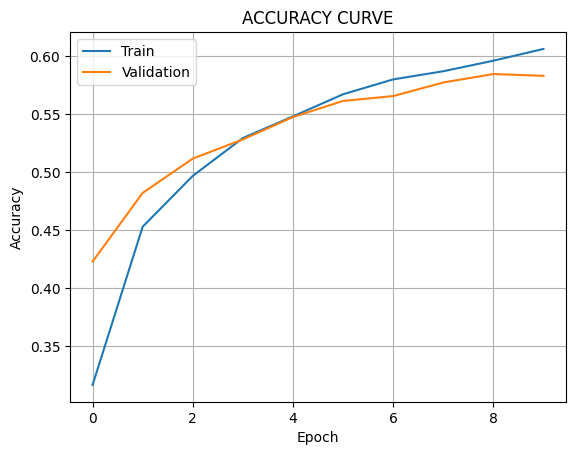

In [16]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()